## EDA DATASETS 2015-2019

In [4]:
import pandas as pd

# Cargar los CSVs en DataFrames desde la carpeta 'Data'
df_2015 = pd.read_csv('../Data/2015.csv')
df_2016 = pd.read_csv('../Data/2016.csv')
df_2017 = pd.read_csv('../Data/2017.csv')
df_2018 = pd.read_csv('../Data/2018.csv')
df_2019 = pd.read_csv('../Data/2019.csv')

# Mostrar las primeras filas de cada dataset para verificar las columnas
print(df_2015.head())
print(df_2016.head())
print(df_2017.head())
print(df_2018.head())
print(df_2019.head())


       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938           

## Estandarizar las columnas

In [5]:
# Renombrar columnas para estandarizar entre los distintos datasets
df_2015.columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 
                   'Dystopia Residual']

df_2016.columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 
                   'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                   'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

df_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Whisker high', 'Whisker low', 'Economy (GDP per Capita)', 
                   'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 
                   'Dystopia Residual']

df_2018.columns = ['Happiness Rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                   'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']

df_2019.columns = df_2018.columns  # Las columnas de 2019 son similares a las de 2018


## Unir todos los DataFrames en uno solo

In [6]:
# Agregar un campo de 'Year' para identificar de qué año es cada dato
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Concatenar los datasets
df_combined = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Mostrar la estructura combinada
print(df_combined.info())
print(df_combined.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
 12  Year                           782 non-null    int

## Tratar valores nulos y limpiar el dataset

In [8]:
# Seleccionar solo las columnas numéricas para calcular la mediana
numeric_columns = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Reemplazar valores nulos en las columnas numéricas con la mediana
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(df_combined[numeric_columns].median())

# Verificar si quedan valores nulos
print(df_combined.isnull().sum())


Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                     0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
Lower Confidence Interval          0
Upper Confidence Interval          0
Whisker high                       0
Whisker low                        0
dtype: int64


## Resumen estadístico del dataset combinado

In [9]:
df_combined.describe()


Happiness Rank  Happiness Score  Standard Error  \
count      782.000000       782.000000      782.000000   
mean        78.698210         5.379018        0.044737   
std         45.182384         1.127456        0.007849   
min          1.000000         2.693000        0.018480   
25%         40.000000         4.509750        0.043940   
50%         79.000000         5.322000        0.043940   
75%        118.000000         6.189500        0.043940   
max        158.000000         7.769000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                782.000000  782.000000                782.000000   
mean                   0.916047    1.078392                  0.612416   
std                    0.407340    0.329548                  0.248309   
min                    0.000000    0.000000                  0.000000   
25%                    0.606500    0.869363                  0.440183   
50%                    0.982205    1.124735                  0.647310   
75%                    1.236187    1.327250                  0.808000   
max                    2.096000    1.644000                  1.141000   

          Freedom  Trust (Government Corruption)  Generosity  \
count  782.000000                     782.000000  782.000000   
mean     0.411091                       0.125392    0.218576   
std      0.152880                       0.105756    0.122321   
min      0.000000                       0.000000    0.000000   
25%      0.309768                       0.054250    0.130000   
50%      0.431000                       0.091000    0.201982   
75%      0.531000                       0.155861    0.278832   
max      0.724000                       0.551910    0.838075   

       Dystopia Residual         Year  Lower Confidence Interval  \
count         782.000000   782.000000                 782.000000   
mean            2.093484  2016.993606                   5.246114   
std             0.438433     1.417364                   0.513414   
min             0.328580  2015.000000                   2.732000   
25%             1.972691  2016.000000                   5.237000   
50%             2.094640  2017.000000                   5.237000   
75%             2.202105  2018.000000                   5.237000   
max             3.837720  2019.000000                   7.460000   

       Upper Confidence Interval  Whisker high  Whisker low  
count                 782.000000    782.000000   782.000000  
mean                    5.431643      5.386343     5.205552  
std                     0.508557      0.497775     0.509066  
min                     3.078000      2.864884     2.521116  
25%                     5.419000      5.370032     5.193152  
50%                     5.419000      5.370032     5.193152  
75%                     5.419000      5.370032     5.193152  
max                     7.669000      7.622030     7.479556

## Matriz de correlaciones

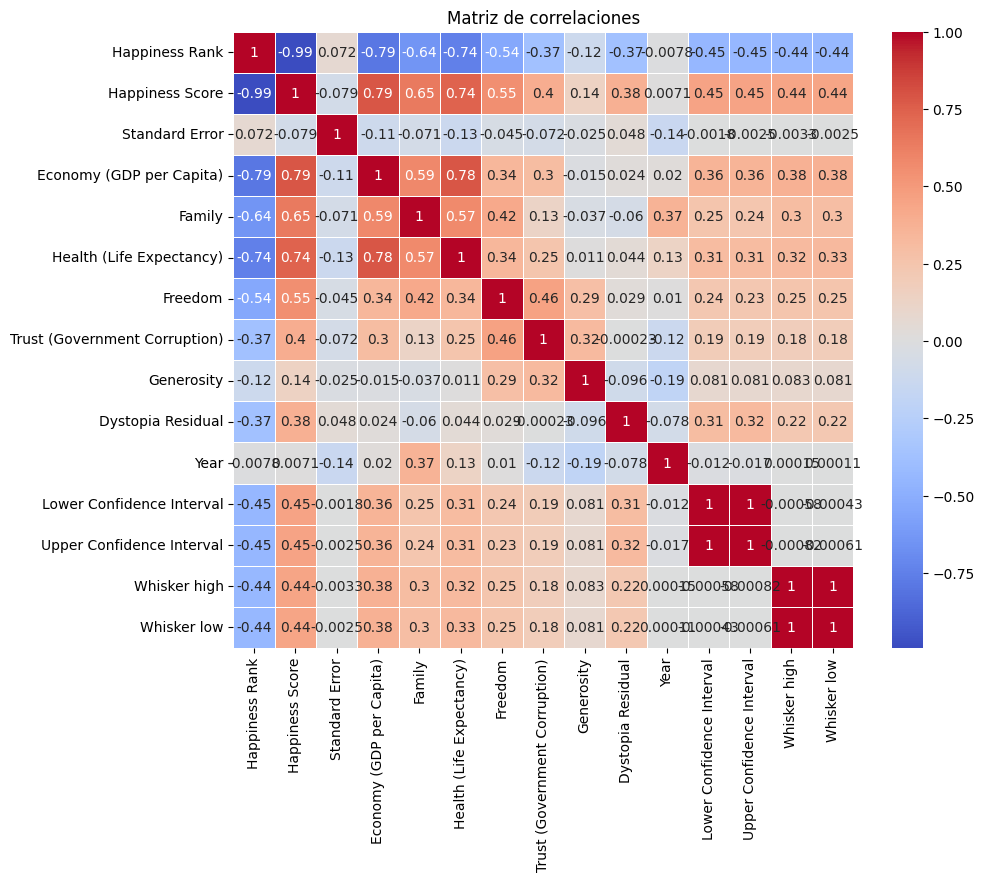

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_combined.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()


## Identificación de datos atípicos (outliers)

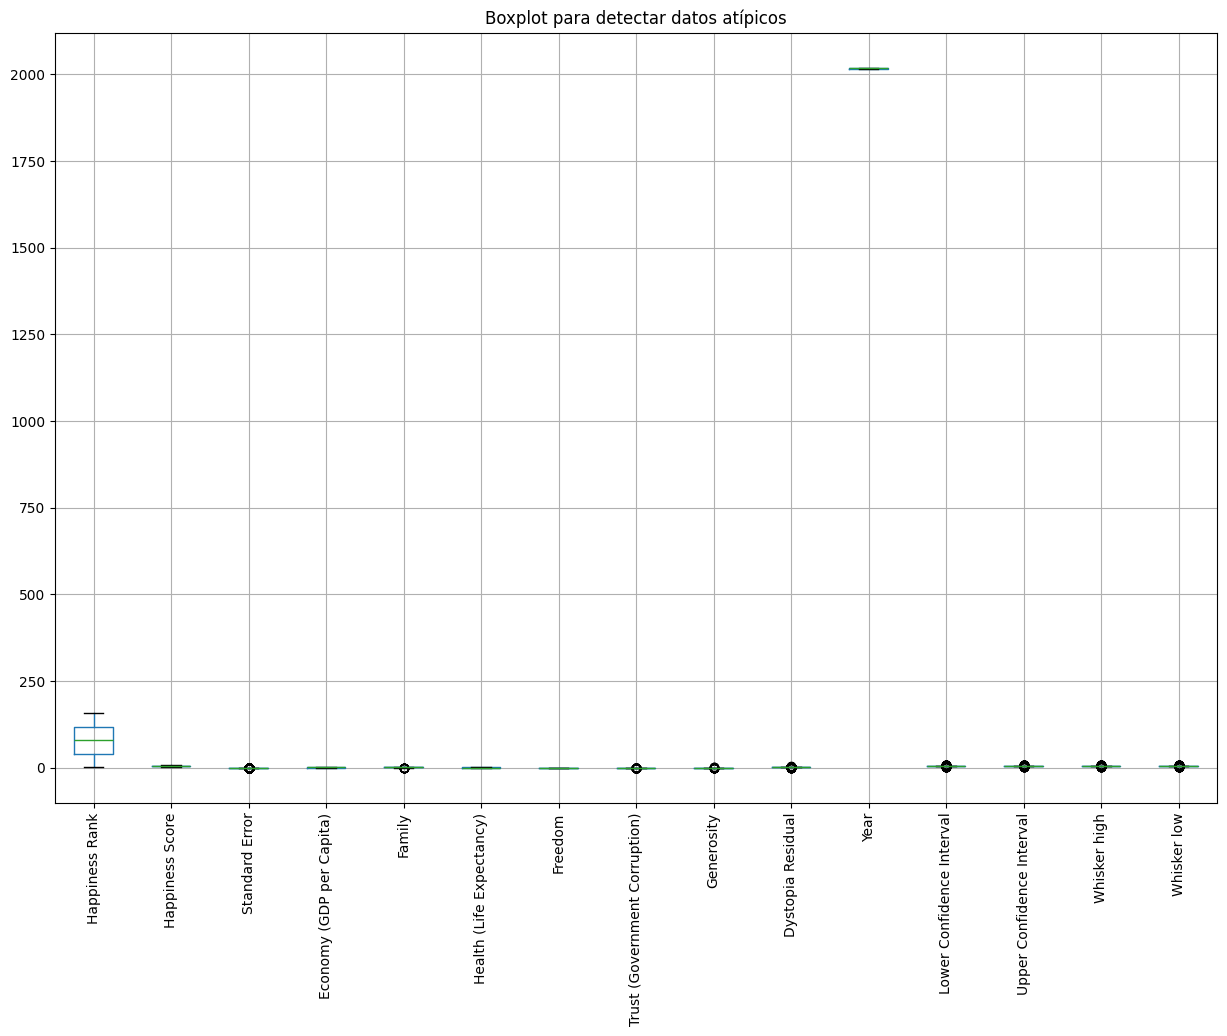

In [13]:
plt.figure(figsize=(15, 10))
df_combined[numeric_columns.columns].boxplot()
plt.title('Boxplot para detectar datos atípicos')
plt.xticks(rotation=90)
plt.show()


## Distribución de los datos por año o región

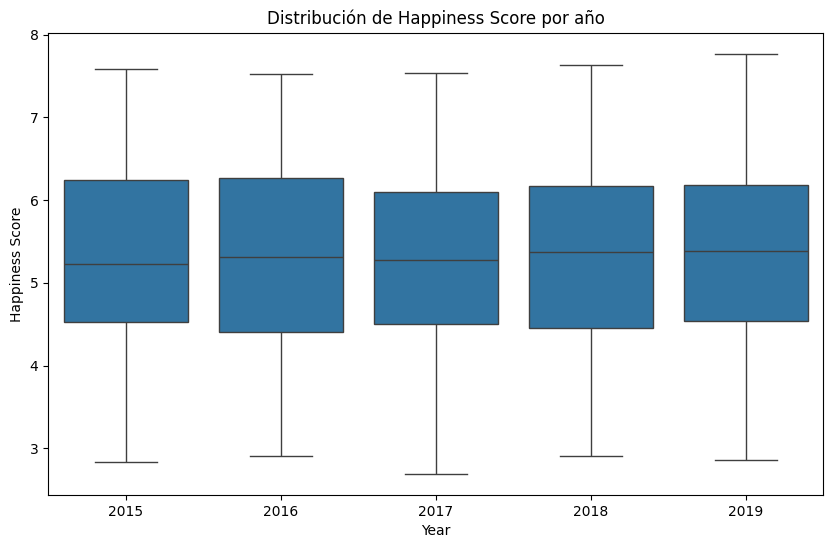

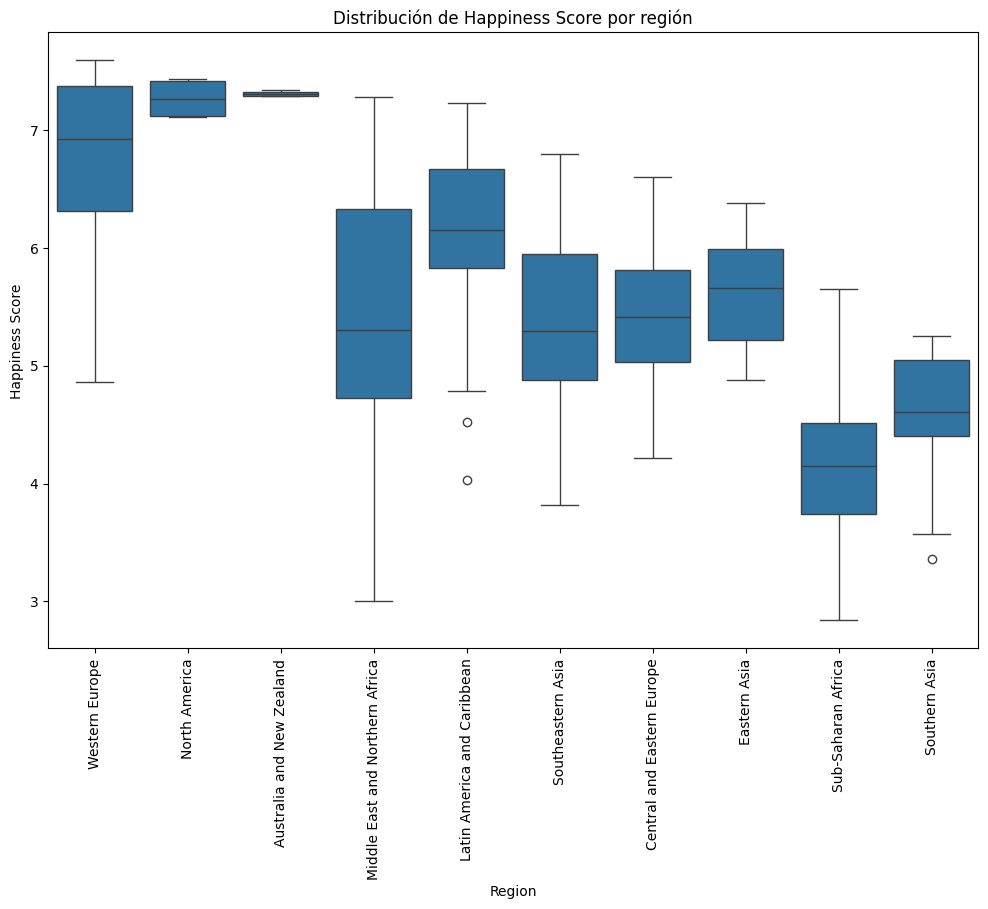

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Happiness Score', data=df_combined)
plt.title('Distribución de Happiness Score por año')
plt.show()

if 'Region' in df_combined.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Region', y='Happiness Score', data=df_combined)
    plt.xticks(rotation=90)
    plt.title('Distribución de Happiness Score por región')
    plt.show()


## Detección de datos atípicos para una columna específica

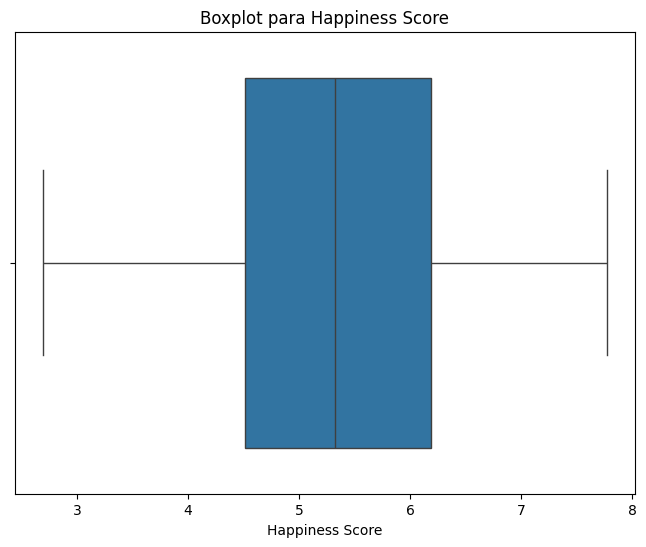

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_combined['Happiness Score'])
plt.title('Boxplot para Happiness Score')
plt.show()


## Distribución de las variables numéricas (Histogramas)

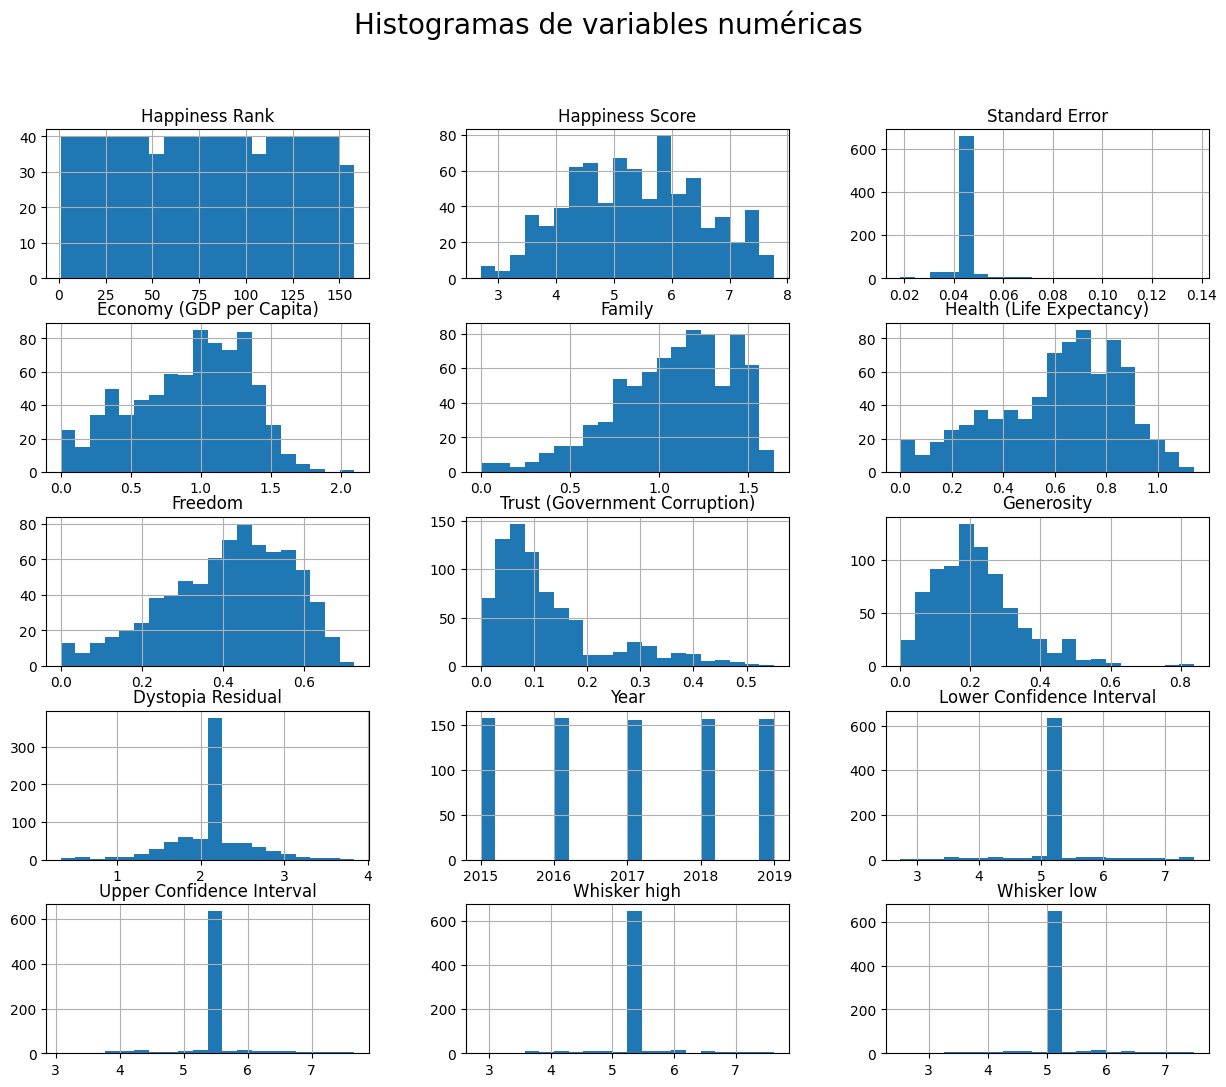

In [19]:
df_combined[numeric_columns.columns].hist(bins=20, figsize=(15, 12), layout=(5, 3))
plt.suptitle('Histogramas de variables numéricas', size=20)
plt.show()


## Diagrama de dispersión (Scatter Plot)


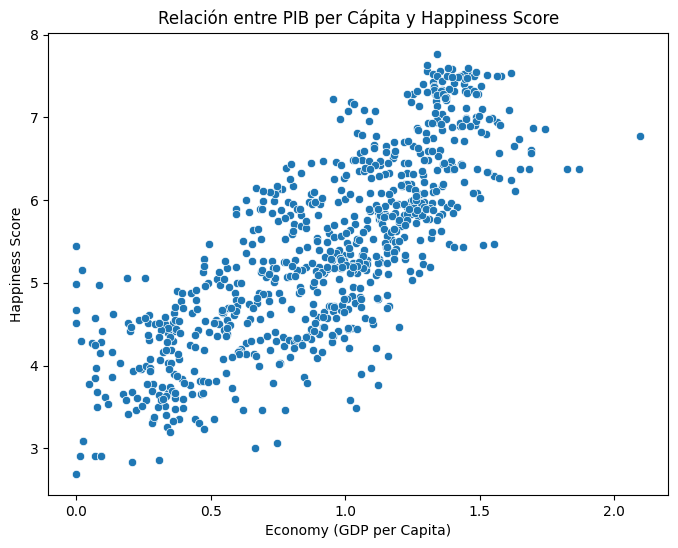

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df_combined)
plt.title('Relación entre PIB per Cápita y Happiness Score')
plt.show()


## Boxplot de 'Happiness Score' por Región o Año

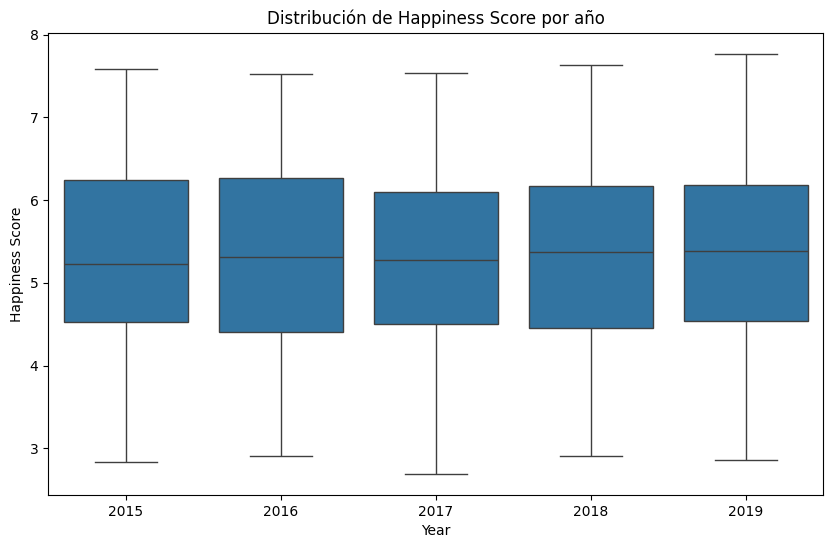

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Happiness Score', data=df_combined)
plt.title('Distribución de Happiness Score por año')
plt.show()


## 

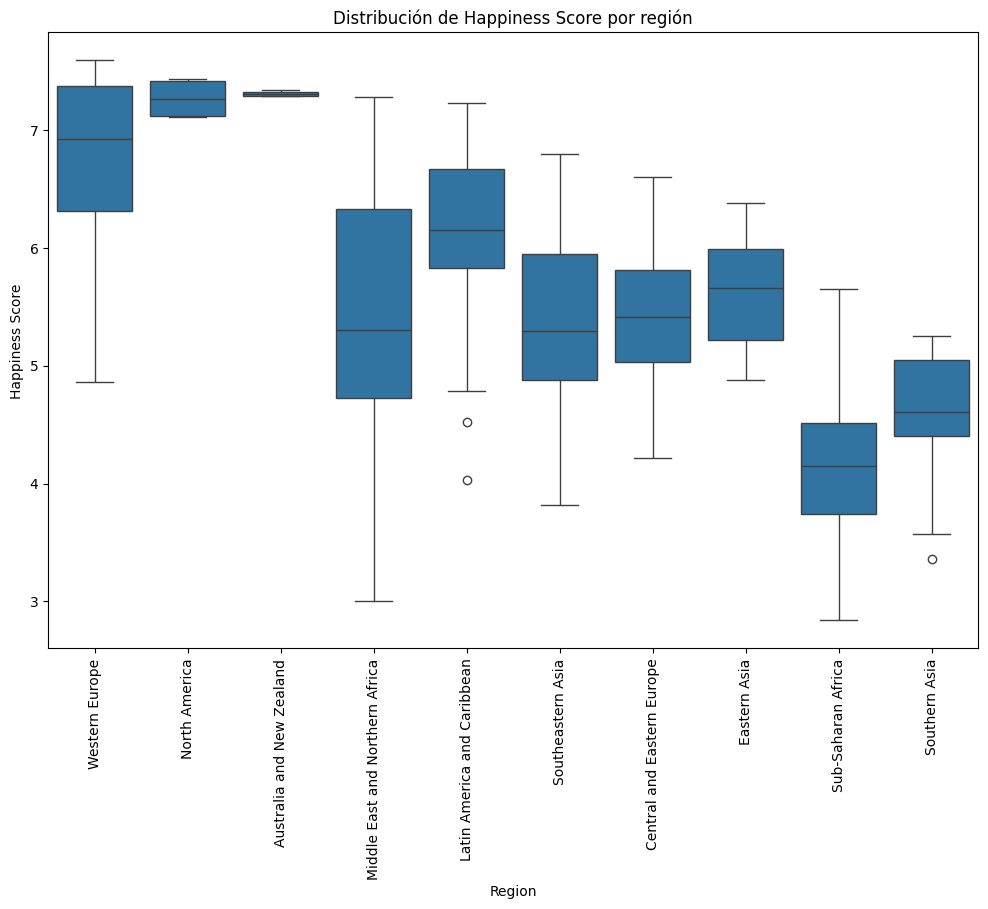

In [21]:
if 'Region' in df_combined.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Region', y='Happiness Score', data=df_combined)
    plt.xticks(rotation=90)
    plt.title('Distribución de Happiness Score por región')
    plt.show()


## Gráfico de barras de la media de Happiness Score por año

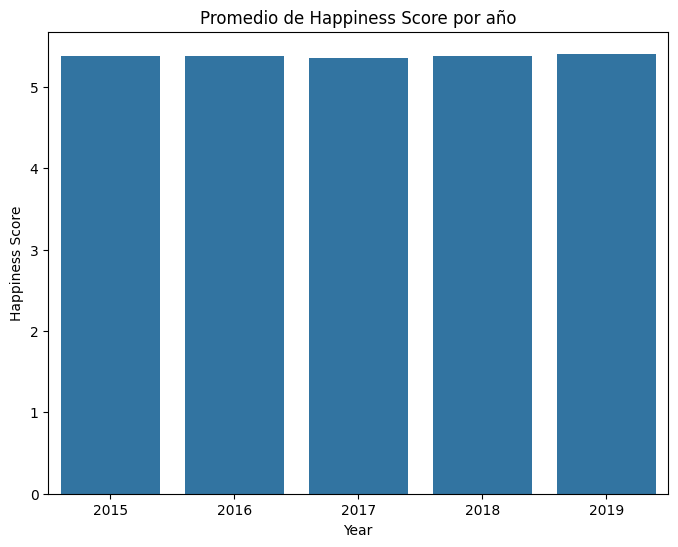

In [22]:
mean_happiness_per_year = df_combined.groupby('Year')['Happiness Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Happiness Score', data=mean_happiness_per_year)
plt.title('Promedio de Happiness Score por año')
plt.show()


## Gráfico de pares (Pairplot)

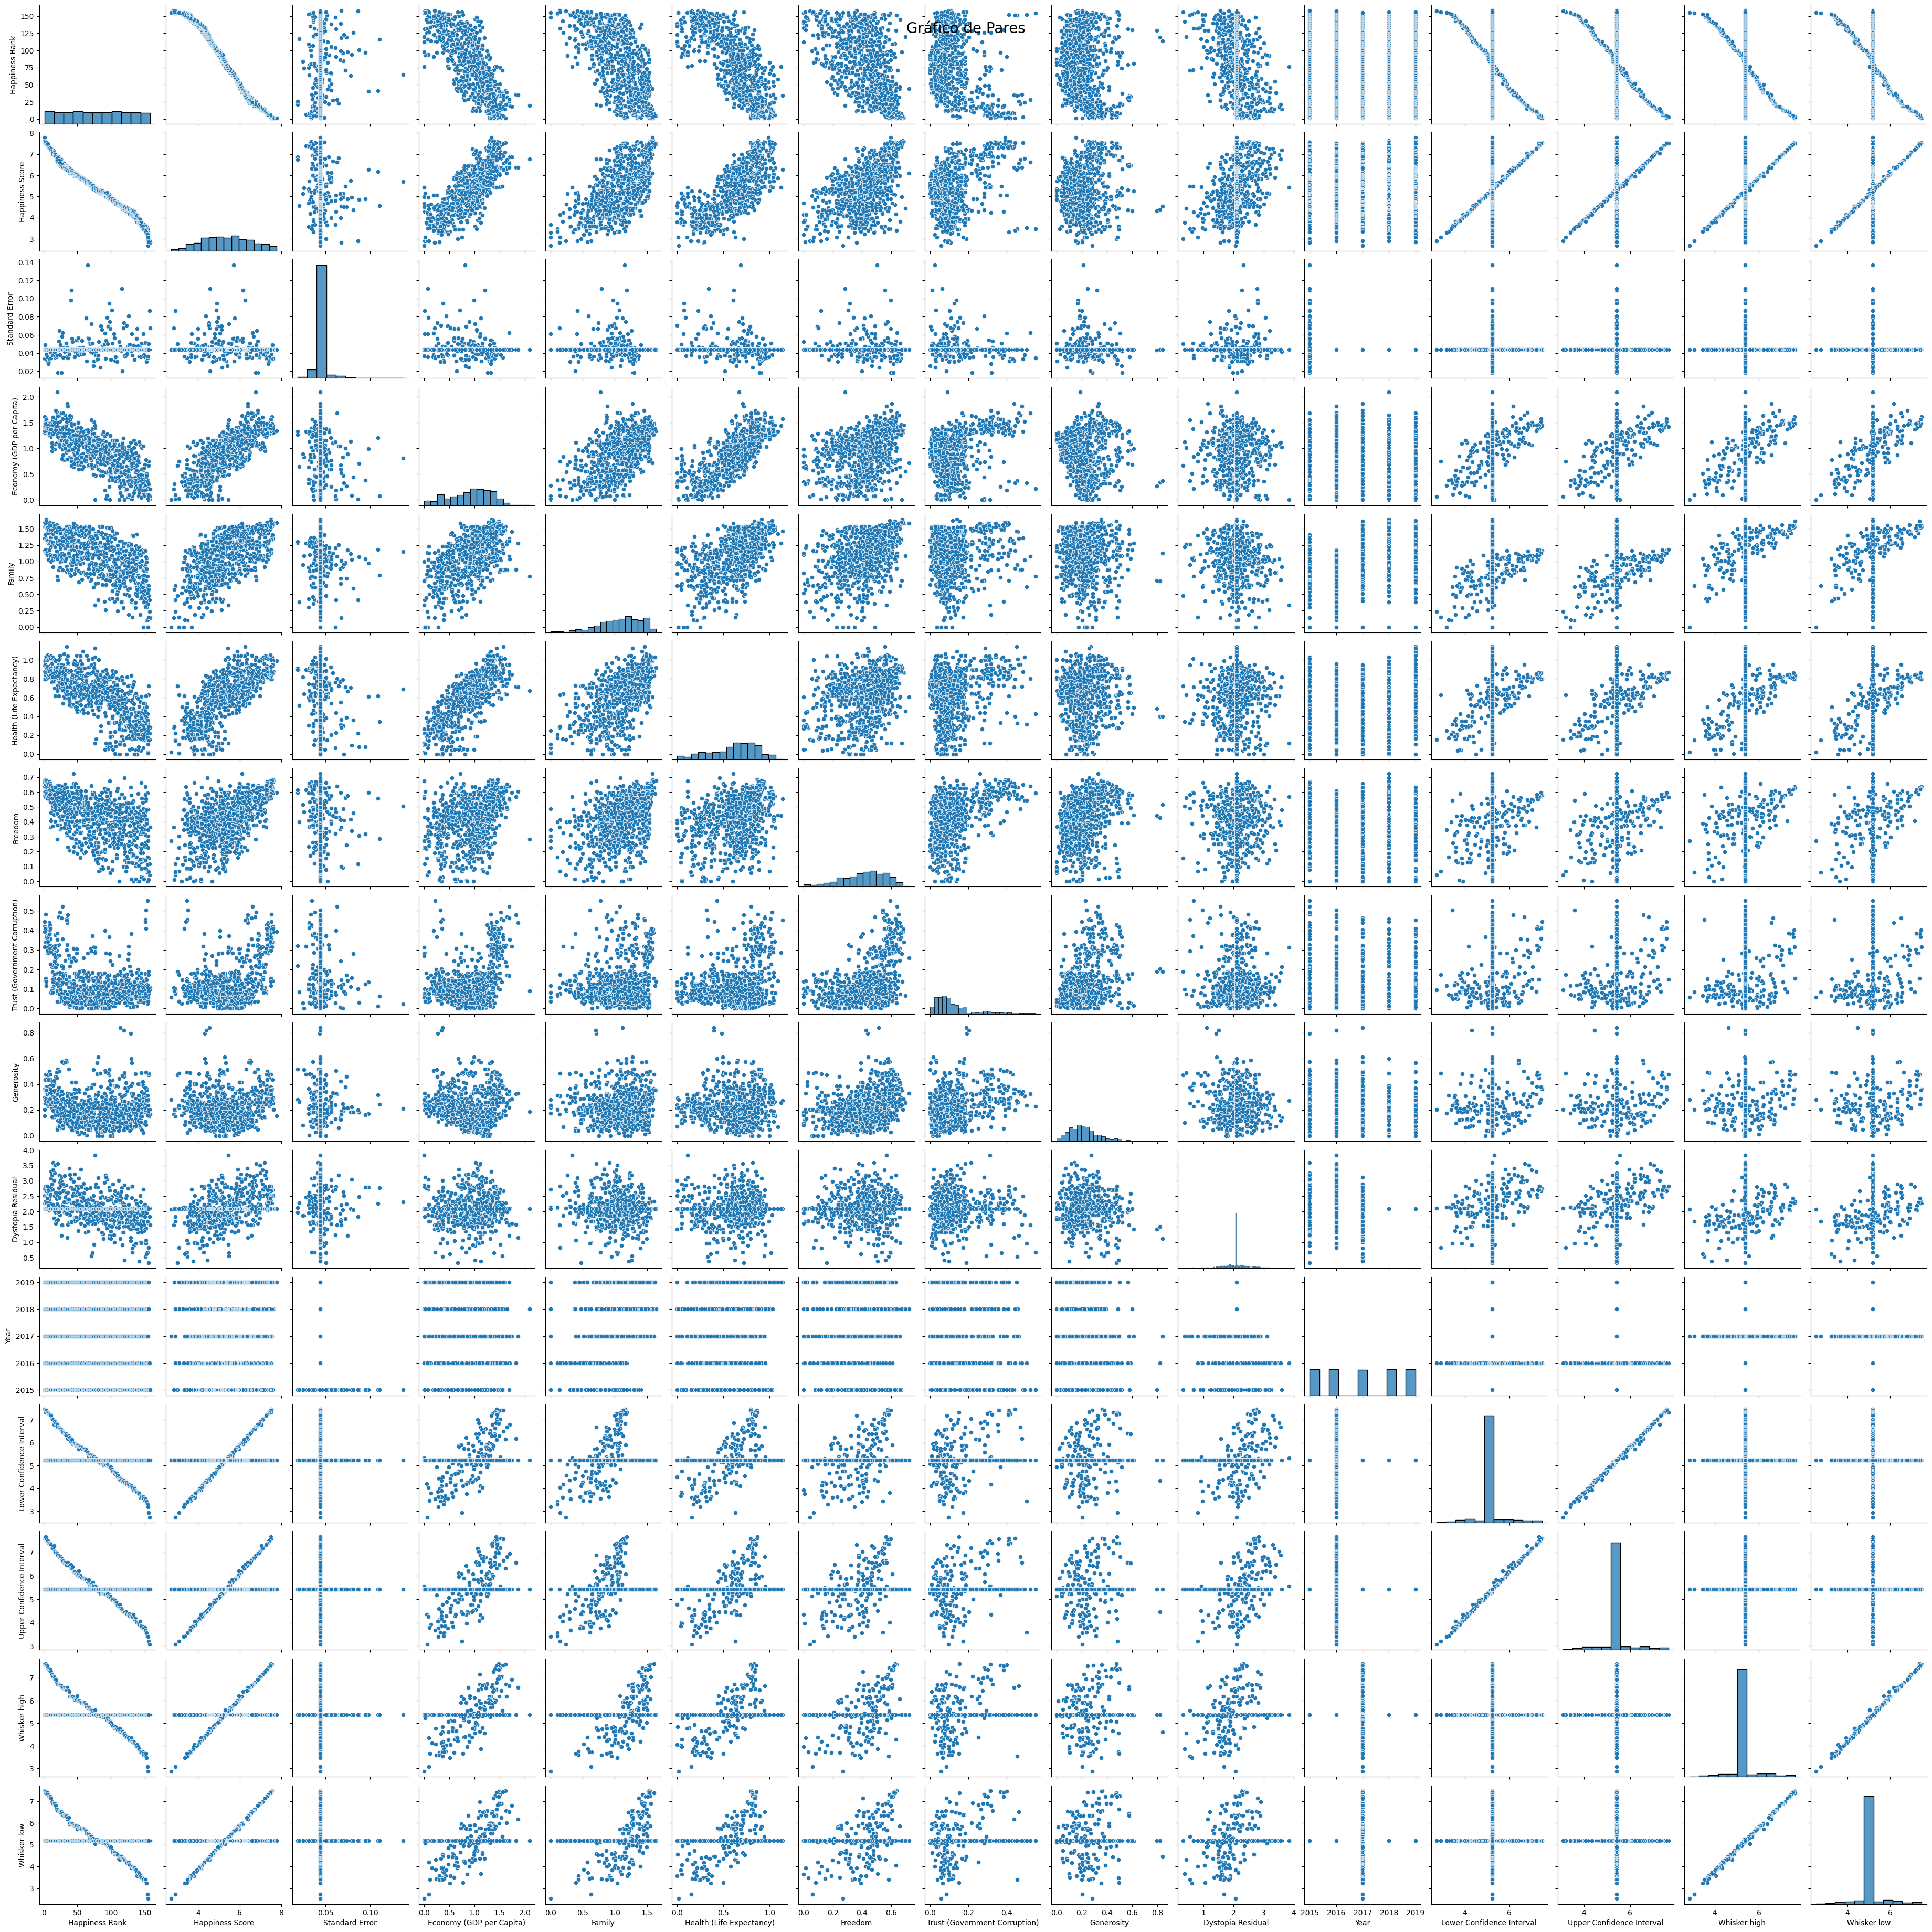

In [23]:
sns.pairplot(df_combined[numeric_columns.columns])
plt.suptitle('Gráfico de Pares', size=20)
plt.show()


## Código para exportar el dataset combinado

In [24]:
df_combined.to_csv('dataset_combinado.csv', index=False)

print("El archivo combinado ha sido exportado como 'dataset_combinado.csv'")


El archivo combinado ha sido exportado como 'dataset_combinado.csv'
